## Task 1 - Part 1

#### Step 1 − Import the necessary packages

In [12]:
# Importar bibliotecas necessárias
import numpy as np
import random
import matplotlib.pyplot as plt  # Corrigido plt00 para plt
from sklearn.linear_model import Ridge, Lasso, RANSACRegressor, LinearRegression  # Unificado as importações do sklearn.linear_model
from sklearn.model_selection import GridSearchCV, train_test_split  # Unificado imports de model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels import robust  # statsmodels não conflita com sklearn, então permanece
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

from sklearn.svm import SVC
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


from tensorflow.keras.layers import BatchNormalization





    


#### Step 1.5 − Picture visulazer

In [13]:
# Função para visualizar as imagens
def img_view (dataset, labels=None, num_imgs=5):
    """
    Função que visualiza um número especificado de imagens.
    
    Parâmetros:
    - dataset: Conjunto de imagens a visualizar.
    - labels: (Opcional) Rótulos das imagens, se disponíveis.
    - num_imgs: Número de imagens a visualizar.
    """
    # Verificar quantas imagens existem no dataset
    num_imgs = min(num_imgs, len(dataset))  # Garante que não tentas visualizar mais imagens do que as disponíveis

    # Criar a figura para visualização
    plt.figure(figsize=(10, 10))
    
    for i in range(num_imgs):
        plt.subplot(1, num_imgs, i+1)
        plt.imshow(dataset[i], cmap='gray')  # Usar 'gray' para imagens em escala de cinza
        plt.axis('off')
        
        if labels is not None:
            plt.title(f"Label: {labels[i]}")

    plt.show()

#### Step 2 − Load the dataset

X_train shape antes do reshape: (2783, 2304)
X_train shape depois do reshape: (2783, 48, 48)


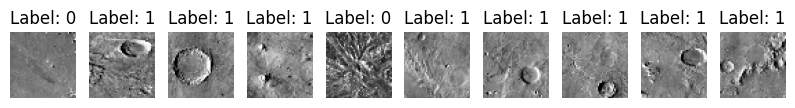

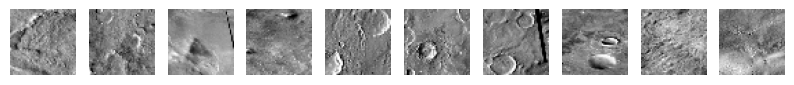

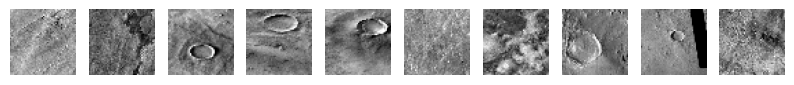

In [14]:
# Carregar os dados
X_test = np.load('Xtest1.npy')
X_train = np.load('Xtrain1.npy')
Y_train = np.load('Ytrain1.npy')
X_train_extra = np.load('Xtrain1_extra.npy')

# Verificar as dimensões dos datasets antes do reshape
print(f"X_train shape antes do reshape: {X_train.shape}")

# Reformatar as imagens para o formato correto (48, 48)
X_train = X_train.reshape(-1, 48, 48)
X_test = X_test.reshape(-1, 48, 48)
X_train_extra = X_train_extra.reshape(-1, 48, 48)

print(f"X_train shape depois do reshape: {X_train.shape}")
#############################################3
# Variável para controlar quantas imagens queres visualizar
num_imagens = 10  # Podes alterar este número para visualizar mais ou menos imagens
#######################################3


# Visualizar imagens de treino com rótulos
img_view(X_train, Y_train, num_imgs=num_imagens)

# Visualizar imagens de teste (sem rótulos)
img_view(X_test, num_imgs=num_imagens)

# Visualizar imagens do dataset extra (sem rótulos)
img_view(X_train_extra, num_imgs=num_imagens)


#### Step 2.5 - processamento

In [15]:
# 2. Preprocessamento: Reshape e Normalização
# Ajustar a forma das imagens para (48, 48, 1) para incluir o canal de cor (grayscale)
# A CNN espera 4 dimensões: (número de amostras, altura, largura, número de canais)
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

# Normalizar os valores dos píxeis para estar entre 0 e 1, dividindo por 255
# Isto ajuda o modelo a convergir melhor durante o treino
X_train = X_train / 255.0
X_test = X_test / 255.0

# Verificar novamente a forma após o reshape
print(f"Forma de X_train depois do reshape: {X_train.shape}")
print(f"Forma de X_test depois do reshape: {X_test.shape}")

# Dividir o conjunto de treino em treino e validação (20% dos dados para validação)
# O conjunto de validação é usado para verificar a performance do modelo durante o treino
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=35)


Forma de X_train depois do reshape: (2783, 48, 48, 1)
Forma de X_test depois do reshape: (696, 48, 48, 1)


Validação - Acurácia: 0.6966
Validação - F1 Score: 0.8124
Relatório de classificação no conjunto de validação:
              precision    recall  f1-score   support

           0       0.63      0.12      0.21       178
           1       0.70      0.97      0.81       379

    accuracy                           0.70       557
   macro avg       0.66      0.54      0.51       557
weighted avg       0.68      0.70      0.62       557



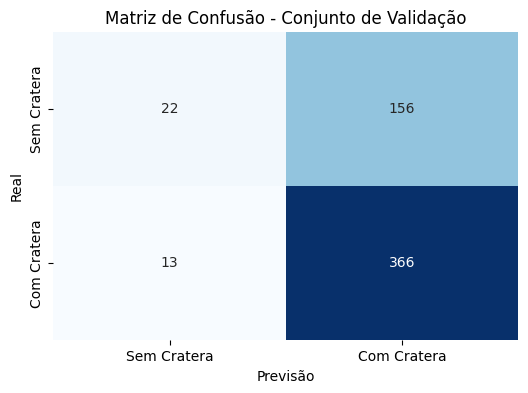

In [16]:
# 6. Preparar para a SVM - Achatar as imagens para transformar em vetores 1D
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# 7. Criar o modelo SVM com class_weight='balanced' para lidar com desbalanceamento de classes
svm_model = SVC(kernel='rbf', C=1, gamma='auto', probability=True, class_weight='balanced')

# 8. Treinar o modelo SVM no conjunto de treino
svm_model.fit(X_train_flat, Y_train)

# 9. Avaliar o modelo no conjunto de validação
Y_val_pred = svm_model.predict(X_val_flat)

# 10. Calcular a acurácia e o F1 Score no conjunto de validação
val_accuracy = accuracy_score(Y_val, Y_val_pred)
f1 = f1_score(Y_val, Y_val_pred)

print(f"Validação - Acurácia: {val_accuracy:.4f}")
print(f"Validação - F1 Score: {f1:.4f}")

# Mostrar o relatório completo de classificação
print("Relatório de classificação no conjunto de validação:")
print(classification_report(Y_val, Y_val_pred))

# 11. Matriz de Confusão
cm = confusion_matrix(Y_val, Y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Sem Cratera', 'Com Cratera'], yticklabels=['Sem Cratera', 'Com Cratera'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Conjunto de Validação')
plt.show()



#### Step 2.5 - Balancing the dataset

Forma de X_train depois do reshape: (2226, 48, 48, 1)
Forma de X_test depois do reshape: (2796, 48, 48, 1)


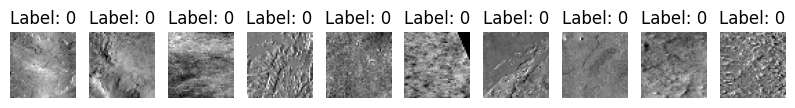

Class distribution in the resampled training set: {0: 1398, 1: 1398}


In [17]:
#RANDOM OVERSAMPLER (OVERSAMPLES MINORITY CLASS)

ros = RandomOverSampler(random_state=35)
X_train_resampled, Y_train_resampled = ros.fit_resample(X_train.reshape(X_train.shape[0], -1), Y_train)

# Reshape the resampled data back to image format
X_train_resampled = X_train_resampled.reshape(-1, 48, 48, 1)

print(f"Forma de X_train depois do reshape: {X_train.shape}")
print(f"Forma de X_test depois do reshape: {X_train_resampled.shape}")
num_imgs_to_view = 10
img_view(X_train_resampled[-num_imgs_to_view:], Y_train_resampled[-num_imgs_to_view:], num_imgs=num_imgs_to_view)

# Check class distribution in the resampled training set
unique, counts = np.unique(Y_train_resampled, return_counts=True)
print(f"Class distribution in the resampled training set: {dict(zip(unique, counts))}")



#### Step 3 −Definir a arquitetura da cnn 

In [18]:
from tensorflow.keras import regularizers

def create_cnn_model(input_shape):
    # L2 regularization factor
    l2_lambda = 0.01  # Can adjust between 0.0001 and 0.01 based on performance

    # Define the CNN
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Reduces to 24x24
    # First convolutional layer:
    # - 8 filters of size 3x3
    # - ReLU activation
    # - L2 regularization
    # - Input shape of 48x48 grayscale image (1 channel)
    model.add(Conv2D(64, (3, 3), activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Reduces to 24x24

    # Second convolutional layer:
    # - 16 filters of size 3x3
    # - ReLU activation
    # - L2 regularization

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Reduces to 24x24



    # Flatten: Converts 3D feature maps into a 1D vector
    model.add(Flatten())

    # Fully connected layer:
    # - 32 neurons (reduced from 64)
    # - ReLU activation
    # - L2 regularization
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))

    # Dropout: Randomly drop 30% of neurons during training to prevent overfitting
    model.add(Dropout(0.4))

    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
    


    # Output layer:
    # - 1 neuron for binary classification
    # - Sigmoid activation function for binary output (crater or not)
    
    model.add(Dense(1, activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    return model





#### Step 3 - Original model

In [19]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=0.000001)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


model_orig=create_cnn_model(X_train.shape[1:])
history_original = model_orig.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_val, Y_val), callbacks=[early_stopping, reduce_lr])


2024-10-19 16:57:50.241557: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-19 16:57:50.242385: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/200
70/70 [==============================] - 3s 30ms/step - loss: 1.8183 - accuracy: 0.6280 - val_loss: 0.9859 - val_accuracy: 0.6804 - lr: 0.0010
Epoch 2/200
70/70 [==============================] - 2s 23ms/step - loss: 0.7867 - accuracy: 0.6761 - val_loss: 0.6103 - val_accuracy: 0.6966 - lr: 0.0010
Epoch 3/200
70/70 [==============================] - 2s 24ms/step - loss: 0.5730 - accuracy: 0.8019 - val_loss: 0.5131 - val_accuracy: 0.8330 - lr: 0.0010
Epoch 4/200
70/70 [==============================] - 2s 24ms/step - loss: 0.5141 - accuracy: 0.8266 - val_loss: 0.4764 - val_accuracy: 0.8259 - lr: 0.0010
Epoch 5/200
70/70 [==============================] - 2s 24ms/step - loss: 0.4606 - accuracy: 0.8441 - val_loss: 0.4448 - val_accuracy: 0.8205 - lr: 0.0010
Epoch 6/200
70/70 [==============================] - 2s 23ms/step - loss: 0.4421 - accuracy: 0.8450 - val_loss: 0.4209 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 7/200
70/70 [==============================] - 2s 23ms/step - lo

#### Step 4.1 - Treinar o modelo 

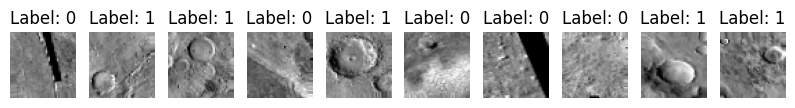

Epoch 1/200


2024-10-19 16:58:37.564121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


88/88 [==============================] - 3s 23ms/step - loss: 1.5259 - accuracy: 0.6227 - val_loss: 0.8321 - val_accuracy: 0.7038 - lr: 0.0010
Epoch 2/200
88/88 [==============================] - 2s 24ms/step - loss: 0.6180 - accuracy: 0.7761 - val_loss: 0.5030 - val_accuracy: 0.8330 - lr: 0.0010
Epoch 3/200
88/88 [==============================] - 2s 24ms/step - loss: 0.4908 - accuracy: 0.8097 - val_loss: 0.4840 - val_accuracy: 0.8312 - lr: 0.0010
Epoch 4/200
88/88 [==============================] - 2s 24ms/step - loss: 0.4631 - accuracy: 0.8122 - val_loss: 0.4374 - val_accuracy: 0.8276 - lr: 0.0010
Epoch 5/200
88/88 [==============================] - 2s 23ms/step - loss: 0.4543 - accuracy: 0.8129 - val_loss: 0.4993 - val_accuracy: 0.8294 - lr: 0.0010
Epoch 6/200
88/88 [==============================] - 2s 21ms/step - loss: 0.4353 - accuracy: 0.8265 - val_loss: 0.4138 - val_accuracy: 0.8528 - lr: 0.0010
Epoch 7/200
88/88 [==============================] - 2s 21ms/step - loss: 0.4249 -

In [20]:
# 5. Treinar o modelo
# - Usamos o método .fit() para treinar o modelo nos dados de treino
# - Validação é monitorizada ao usar o conjunto de validação
# - O treino ocorre por 15 épocas com um batch size de 32 (pode-se ajustar esses valores)

# Create an instance of ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=10,              # Reduce rotation
    width_shift_range=0.05,   # Reduce the horizontal shift to 5% of the width
    height_shift_range=0.05,        # Slightly reduce height shift

)


#print(f"Min pixel value: {X_train_resampled.min()}")
#print(f"Max pixel value: {X_train_resampled.max()}")

#img_view(X_train_resampled, num_imgs=10)
# Generate and visualize 10 augmented images
#sample_image = X_train_resampled[0].reshape(48, 48, 1)  # Use a sample image from X_train_resampled
#sample_image = sample_image.reshape((1,) + sample_image.shape)  # Reshape for ImageDataGenerator

#gen = datagen.flow(sample_image, batch_size=1)  # Initialize the generator

#augmented_images = [datagen.flow(X_train_resampled.reshape(-1, 48, 48, 1), batch_size=1).next()[0].reshape(48, 48) for _ in range(10)]

# Visualize the generated images
#img_view(augmented_images, num_imgs=10)

# Function to visualize augmented images
def visualize_augmented_images(datagen, original_images, labels, num_images=10, batch_size=5):
    """
    Visualizes augmented images generated by the datagen.
    
    Parameters:
    - datagen: ImageDataGenerator instance.
    - original_images: Original images to generate augmentations from.
    - labels: Corresponding labels for the original images.
    - num_images: Number of augmented images to visualize.
    - batch_size: Number of images per batch.
    """
    # Create a batch of augmented images
    for batch in datagen.flow(X_train_resampled.reshape(-1, 48, 48, 1), Y_train_resampled, batch_size=num_images):
        batch_images = batch[0]  # Get the images from the batch
        batch_labels = batch[1]  # Get the labels from the batch
        break  # We only need one batch for visualization
    
    # Use the img_view function to visualize the images
    img_view(batch_images.reshape(-1, 48, 48), batch_labels, num_imgs=num_images)


    

# Visualize some augmented images
visualize_augmented_images(datagen, X_train_resampled, Y_train_resampled, num_images=10, batch_size=5)



callbacks=[early_stopping, reduce_lr]







model_resampled=create_cnn_model(X_train_resampled.shape[1:])

history_resampled = model_resampled.fit(
    datagen.flow(X_train_resampled, Y_train_resampled, batch_size=32),
    validation_data=(X_val, Y_val),
    epochs=200,
    callbacks=callbacks
)

#history_resampled = model_resampled.fit(X_train_resampled, Y_train_resampled, epochs=15, batch_size=32, validation_data=(X_val, Y_val))

#history_resampled = model_resampled.fit(X_train_resampled, Y_train_resampled, epochs=15, batch_size=32, validation_data=(X_val, Y_val), callbacks=[early_stopping])
# O objeto "history" guarda a precisão e a perda de cada época, útil para gráficos


#### Step 4 - With regularization


In [21]:
# 6. Avaliar o modelo no conjunto de teste
# - Usamos o método .evaluate() para testar o modelo nos dados não vistos
# - Ele retorna a perda e a métrica (neste caso, accuracy)
#test_loss, test_acc = model.evaluate(X_test, verbose=2)
#print(f"Test accuracy: {test_acc}")


#### Step 7 − View model


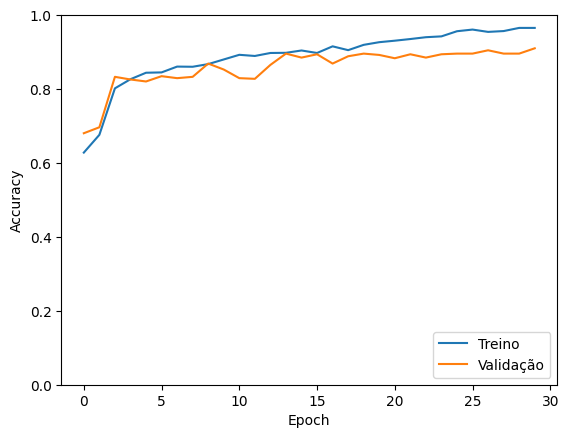

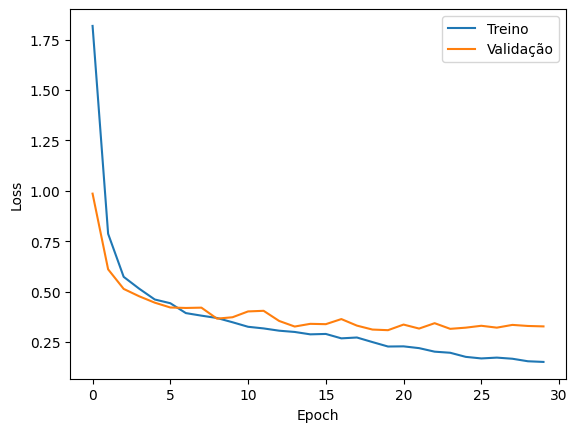

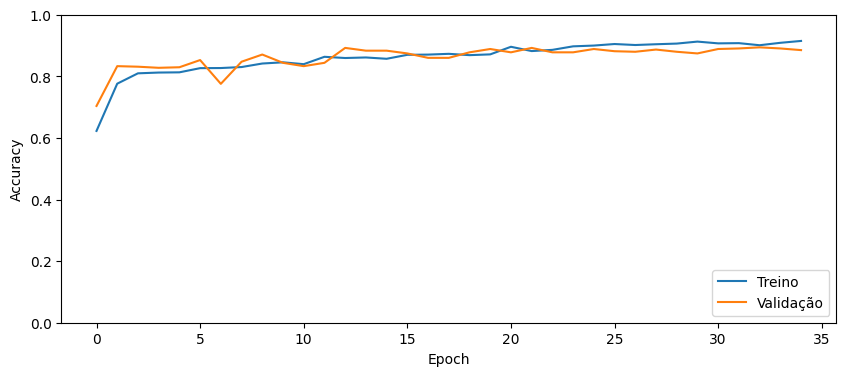

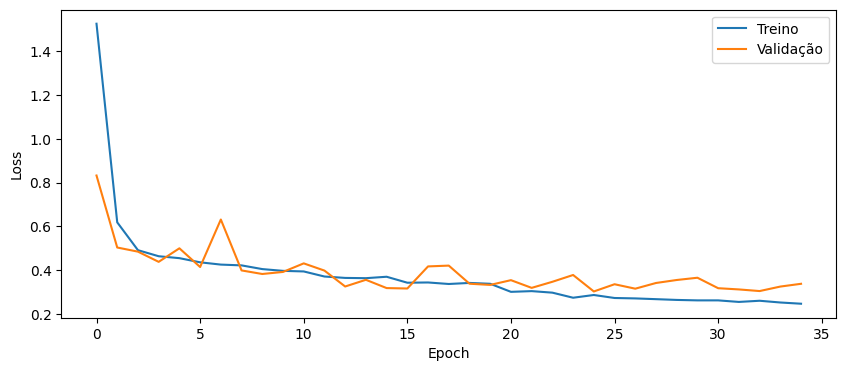

In [22]:
# 7. Gráficos da precisão de treino e validação
# - Visualizamos como a precisão evoluiu ao longo das épocas
plt.plot(history_original.history['accuracy'], label='Treino')
plt.plot(history_original.history['val_accuracy'], label = 'Validação')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Se quiseres visualizar também a perda, podes usar:
plt.plot(history_original.history['loss'], label='Treino')
plt.plot(history_original.history['val_loss'], label = 'Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 7. Gráficos da precisão de treino e validação
# - Visualizamos como a precisão evoluiu ao longo das épocas
plt.figure(figsize=(10, 4))
plt.plot(history_resampled.history['accuracy'], label='Treino')
plt.plot(history_resampled.history['val_accuracy'], label = 'Validação')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 4))
# Se quiseres visualizar também a perda, podes usar:
plt.plot(history_resampled.history['loss'], label='Treino')
plt.plot(history_resampled.history['val_loss'], label = 'Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


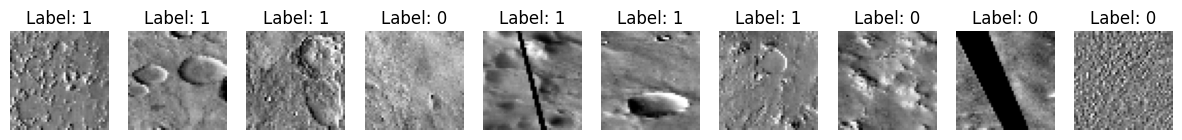

In [23]:
# Vamos mostrar as primeiras 10 imagens do conjunto de validação e seus rótulos correspondentes
# 0 - Sem cratera
# 1 - Com cratera

def visualizar_imagens_validacao(X_val, Y_val, num_imagens=10):
    plt.figure(figsize=(15, 15))
    
    for i in range(num_imagens):
        plt.subplot(1, num_imagens, i + 1)
        plt.imshow(X_val[i].reshape(48, 48), cmap='gray')  # Exibimos a imagem em escala de cinza
        plt.title(f"Label: {Y_val[i]}")
        plt.axis('off')  # Desativa os eixos
        
    plt.show()

# Chamar a função para visualizar as primeiras 10 imagens e seus rótulos
visualizar_imagens_validacao(X_val, Y_val, num_imagens=10)


18/18 [==============================] - 0s 7ms/step
F1 Score no conjunto de validação ORIGINAL: 0.9208
F1 Score no conjunto de validação RESAMPLED: 0.9207


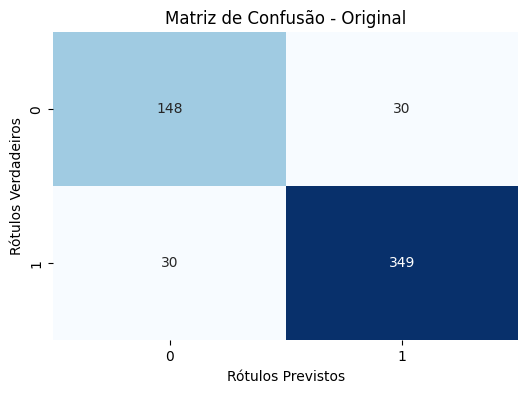

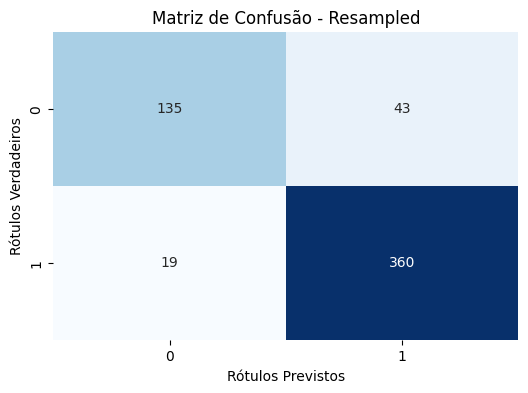

In [24]:
from sklearn.metrics import f1_score

# Fazer previsões no conjunto de validação (X_val)
# O modelo gera probabilidades, então usamos um limiar de 0.5 para classificar
Y_pred_val_orig = (model_orig.predict(X_val) > 0.5).astype("int32")
Y_pred_val_resampled = (model_resampled.predict(X_val) > 0.5).astype("int32")


# Calcular o F1 Score
f1 = f1_score(Y_val, Y_pred_val_orig)

print(f"F1 Score no conjunto de validação ORIGINAL: {f1:.4f}")

# Calcular o F1 Score
f1 = f1_score(Y_val, Y_pred_val_resampled)

print(f"F1 Score no conjunto de validação RESAMPLED: {f1:.4f}")


# Função para exibir a matriz de confusão
def plot_confusion_matrix(Y_true, Y_pred, model_name="Modelo"):
    """
    Função para calcular e plotar a matriz de confusão.
    
    Parâmetros:
    - Y_true: Rótulos verdadeiros.
    - Y_pred: Rótulos previstos.
    - model_name: Nome do modelo (para o título do gráfico).
    """
    # Calcular a matriz de confusão
    cm = confusion_matrix(Y_true, Y_pred)

    # Plotar a matriz de confusão usando Seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel('Rótulos Previstos')
    plt.ylabel('Rótulos Verdadeiros')
    plt.show()



# Plotar a matriz de confusão para o modelo original
plot_confusion_matrix(Y_val, Y_pred_val_orig, model_name="Original")

# Plotar a matriz de confusão para o modelo resampled
plot_confusion_matrix(Y_val, Y_pred_val_resampled, model_name="Resampled")




#### USING EXTRA UNLABELED DATA

In [25]:
# Step 3: Combine original labeled data with pseudo-labeled data

X_train_extra = X_train_extra.reshape(-1, 48, 48, 1)

predictions = model_resampled.predict(X_train_extra)

pseudo_labels = (predictions > 0.9).astype("int32")

confident_indices = np.where(pseudo_labels == 1)[0]
X_pseudo_labeled = X_train_extra[confident_indices]
y_pseudo_labeled = pseudo_labels[confident_indices]


# Combine the pseudo-labeled data with the original labeled dataset
X_combined = np.concatenate((X_train_resampled, X_pseudo_labeled), axis=0)
y_pseudo_labeled = y_pseudo_labeled.reshape(-1)
Y_combined = np.concatenate((Y_train_resampled, y_pseudo_labeled), axis=0)


# Get prediction probabilities for X_train_extra
#Y_pred_probs_extra = model_resampled.predict(X_train_extra)

# Set a higher threshold for confident predictions (e.g., 0.9)
#high_confidence_threshold = 0.9

# Only keep the predictions where the probability is above the threshold
#high_confidence_indices = np.where((Y_pred_probs_extra > high_confidence_threshold) | 
#                                   (Y_pred_probs_extra < (1 - high_confidence_threshold)))[0]

# Filter X_train_extra and Y_pred_val_resampled for only the high-confidence examples
#X_train_extra_high_conf = X_train_extra[high_confidence_indices]
#Y_pred_val_resampled_high_conf = (Y_pred_probs_extra[high_confidence_indices] > 0.5).astype("int32").flatten()

# Ensure X_train_extra_high_conf has the shape (n_samples, 48, 48, 1)
#X_train_extra_high_conf = X_train_extra_high_conf.reshape(-1, 48, 48, 1)

# Now concatenate both datasets along the sample axis (axis=0)
#X_combined = np.concatenate([X_train_resampled, X_train_extra_high_conf], axis=0)
#Y_combined = np.concatenate([Y_train_resampled, Y_pred_val_resampled_high_conf], axis=0)

# Shuffle the combined dataset
#combined_indices = np.arange(X_combined.shape[0])
#np.random.shuffle(combined_indices)
#X_combined = X_combined[combined_indices]
#Y_combined = Y_combined[combined_indices]



#X_combined_flat = X_combined.reshape(X_combined.shape[0], -1)

#ros = RandomOverSampler(random_state=42)
#X_combined_resampled, Yfrom tensorflow.keras import regularizers


model_pseudo=create_cnn_model(X_combined.shape[1:])


history_pseudo = model_pseudo.fit(
    datagen.flow(X_combined, Y_combined, batch_size=32),
    validation_data=(X_val, Y_val),
    epochs=200,
    callbacks=callbacks
)

Y_pred_val_extra = (model_pseudo.predict(X_val) > 0.5).astype("int32")

f1 = f1_score(Y_val, Y_pred_val_extra)

print(f"F1 Score no conjunto de validação RESAMPLED: {f1:.4f}")




29/29 [==============================] - 0s 8ms/step
Epoch 1/200


2024-10-19 16:59:48.925244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


115/115 [==============================] - 3s 23ms/step - loss: 1.5266 - accuracy: 0.7038 - val_loss: 0.8855 - val_accuracy: 0.8025 - lr: 0.0010
Epoch 2/200
115/115 [==============================] - 3s 25ms/step - loss: 0.6521 - accuracy: 0.8277 - val_loss: 0.6752 - val_accuracy: 0.7989 - lr: 0.0010
Epoch 3/200
115/115 [==============================] - 3s 25ms/step - loss: 0.4845 - accuracy: 0.8454 - val_loss: 0.6546 - val_accuracy: 0.8061 - lr: 0.0010
Epoch 4/200
115/115 [==============================] - 3s 24ms/step - loss: 0.4324 - accuracy: 0.8544 - val_loss: 0.5418 - val_accuracy: 0.8205 - lr: 0.0010
Epoch 5/200
115/115 [==============================] - 3s 23ms/step - loss: 0.3979 - accuracy: 0.8585 - val_loss: 0.5749 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 6/200
115/115 [==============================] - 3s 25ms/step - loss: 0.3875 - accuracy: 0.8579 - val_loss: 0.4976 - val_accuracy: 0.8205 - lr: 0.0010
Epoch 7/200
115/115 [==============================] - 3s 25ms/step - 

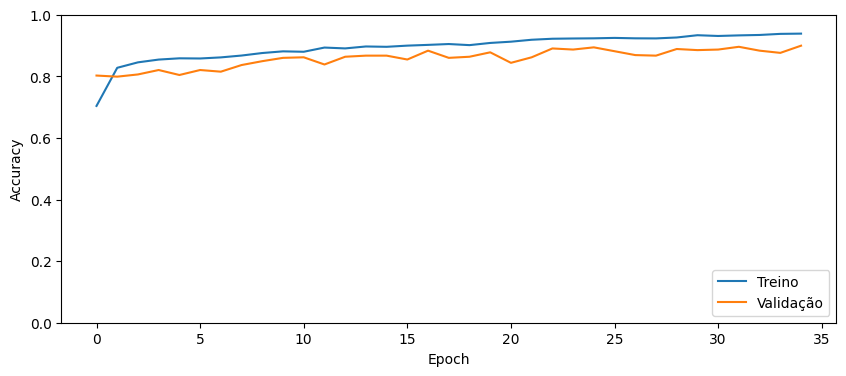

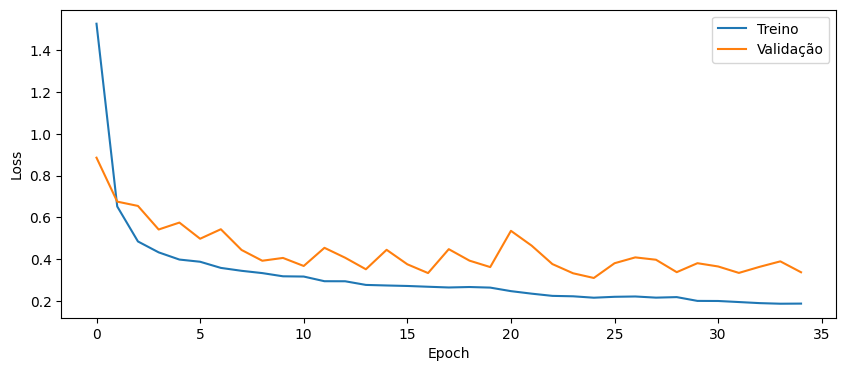

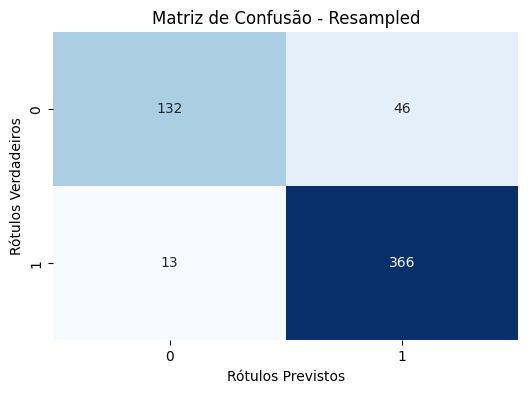

In [26]:

# 7. Gráficos da precisão de treino e validação
# - Visualizamos como a precisão evoluiu ao longo das épocas
plt.figure(figsize=(10, 4))
plt.plot(history_pseudo.history['accuracy'], label='Treino')
plt.plot(history_pseudo.history['val_accuracy'], label = 'Validação')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 4))
# Se quiseres visualizar também a perda, podes usar:
plt.plot(history_pseudo.history['loss'], label='Treino')
plt.plot(history_pseudo.history['val_loss'], label = 'Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plotar a matriz de confusão para o modelo resampled
plot_confusion_matrix(Y_val, Y_pred_val_extra, model_name="Resampled")


In [27]:


#Y_pred = (model_pseudo.predict(X_test) > 0.5).astype("int32")

#Y_pred = Y_pred.flatten()

#print(X_test.shape)
#print(Y_pred.shape)
#print(Y_pred[:-10])

#np.save('ytest_pred.npy', Y_pred)



